# Importing necessary Libraries

In [14]:
# Import necessary libraries
import numpy as np               # For numerical computations, working with arrays
import pandas as pd              # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import seaborn as sns            # For advanced visualizations with a better aesthetic

# Import TensorFlow and Keras libraries for building neural networks
import tensorflow as tf
from tensorflow.keras.models import Sequential        # Sequential model for stacking layers linearly
from tensorflow.keras.layers import Dense, Flatten    # Layers for fully connected (Dense) and flattening layers
from tensorflow.keras.optimizers import Adam          # Adam optimizer for training the model efficiently


# Loading the dataset

In [16]:
# Step 1: Load the Fashion MNIST Dataset
# Fashion MNIST dataset is available in Keras and can be easily loaded using the following line:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Step 2: Understand the structure of the dataset
# Print the shape of the data arrays to understand the dataset dimensions:
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Training labels shape: (60000,)
Test labels shape: (10000,)



### Dataset Overview

The **Fashion MNIST** dataset contains grayscale images of 10 different types of clothing items. These images are 28x28 pixels, and the dataset includes both training and test sets.

- **Training Data**: The training dataset consists of 60,000 images, each with a size of 28x28 pixels. These images are used to train the machine learning model.
- **Test Data**: The test dataset consists of 10,000 images, also of size 28x28 pixels. These images are used to evaluate the performance of the model after it has been trained.
- **Training Labels**: The labels correspond to the correct clothing category for each of the 60,000 training images. The labels are integers between 0 and 9.
- **Test Labels**: Similar to the training labels, the test labels correspond to the correct clothing category for each of the 10,000 test images.

### Dataset Description

- **Fashion MNIST** is a popular benchmark dataset in machine learning, often used for training image classification models. The dataset consists of 28x28 grayscale images of clothing items, making it simpler than natural image datasets like CIFAR-10 or ImageNet.
- **Classes in the Dataset**:
  1. T-shirt/top
  2. Trouser
  3. Pullover
  4. Dress
  5. Coat
  6. Sandal
  7. Shirt
  8. Sneaker
  9. Bag
  10. Ankle boot

The labels are integers (0-9) that correspond to these clothing categories, where each integer represents a different class. For example, the label `0` corresponds to "T-shirt/top", `1` to "Trouser", and so on.

### Data Format:

- **X_train**: A NumPy array of shape `(60000, 28, 28)` where each entry is a 28x28 pixel image.
- **y_train**: A NumPy array of shape `(60000,)` containing the integer labels for each image in the training set.
- **X_test**: A NumPy array of shape `(10000, 28, 28)` where each entry is a 28x28 pixel image for the test set.
- **y_test**: A NumPy array of shape `(10000,)` containing the integer labels for each image in the test set.




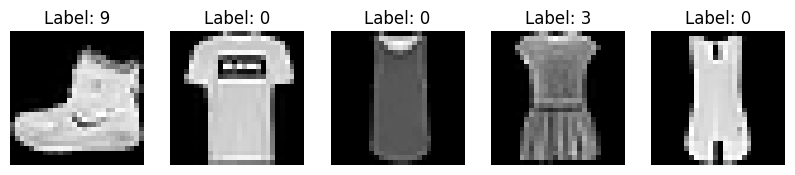

In [22]:
# Step 4: Visualize Some Sample Images from the Training Dataset

plt.figure(figsize=(10, 5))

# Loop through the first 5 images and display them with their labels
for i in range(5):
    plt.subplot(1, 5, i+1)  # Creates a subplot with 1 row and 5 columns
    plt.imshow(X_train[i], cmap='gray')  # Show the image in grayscale
    plt.title(f"Label: {y_train[i]}")  # Title with the label number
    plt.axis('off')  # Hide the axis for a cleaner view

plt.show()  # Display the plot


In [18]:
# Step 5: Normalize the Data


X_train = X_train / 255.0  # Normalize training images
X_test = X_test / 255.0    # Normalize test images


The pixel values range from 0 to 255, which is typical for image data. To make the training more efficient.


we will normalize the pixel values to a range of 0 to 1 by dividing by 255.

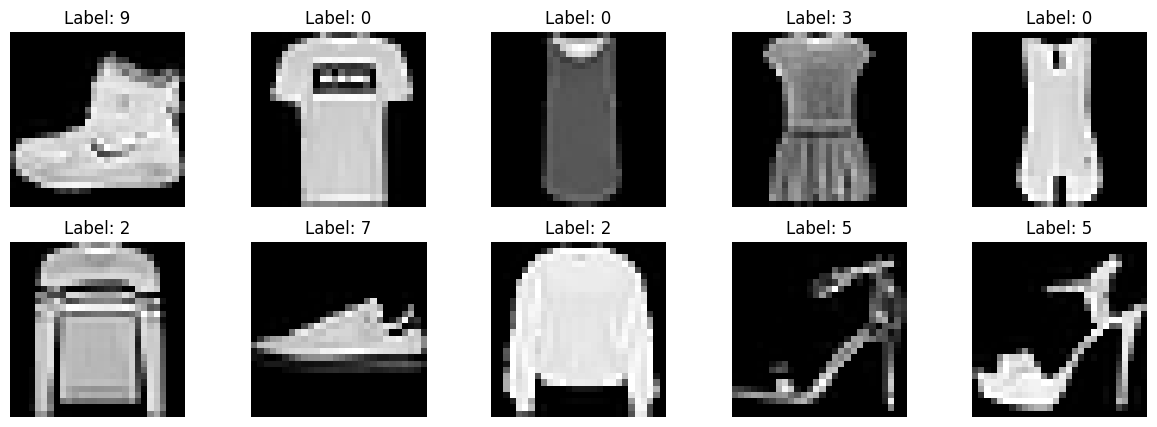

In [19]:
# Step 6: Visualizations

# 1. Display Sample Images from the Training Dataset
# Let's visualize the first 10 images in the training set along with their corresponding labels.

plt.figure(figsize=(15, 5))

# Loop through the first 10 images and display them with their labels
for i in range(10):
    plt.subplot(2, 5, i+1)  # Creates a subplot with 2 rows and 5 columns
    plt.imshow(X_train[i], cmap='gray')  # Show the image in grayscale
    plt.title(f"Label: {y_train[i]}")  # Title with the label number
    plt.axis('off')  # Hide the axis for a cleaner view

plt.show()  # Display the plot


### Result Interpretation

This code will display the first 10 images from the **Fashion MNIST** training dataset along with their corresponding labels.

- Each image will be shown in **grayscale**, providing a clear visual representation of the clothing item.
- The **title of each image** will correspond to the numeric label of the class (e.g., 0 for T-shirt/top, 1 for Trouser, 2 for Pullover, etc.).
- The layout will be arranged in a **2x5 grid** to fit all 10 images into a single view, ensuring the images are easily accessible for visual inspection.

This visualization helps to:
- Provide a visual understanding of the types of clothing in the dataset.
- Facilitate the interpretation of the data for model training and validation.
- Serve as a quick reference to map the numeric labels to their corresponding clothing categories.

By showing these images, you can better grasp the variations and distinct characteristics in each class, which is important when training a machine learning model for image classification.


<ipython-input-20-3bd8fa60222e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(10), y=class_counts, palette='Set2')


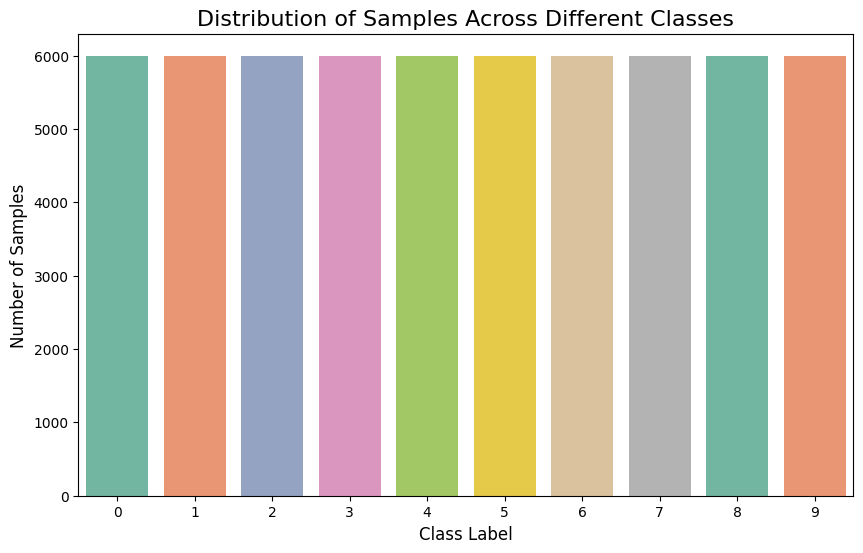

In [20]:
# 2. Bar Chart Showing Class Distribution
# To show the distribution of samples across the different classes, we will create a bar chart.

import seaborn as sns

# Count the occurrences of each label in the training set
class_counts = np.bincount(y_train)

# Create a bar chart of the class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=np.arange(10), y=class_counts, palette='Set2')

# Add titles and labels
plt.title('Distribution of Samples Across Different Classes', fontsize=16)
plt.xlabel('Class Label', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.xticks(np.arange(10), labels=np.arange(10))  # Label the x-axis with class labels (0-9)

plt.show()


### Result Interpretation

The `np.bincount()` function is used to count the number of occurrences of each class label in `y_train`, which represents the training labels.

- The function calculates the frequency of each class label (from 0 to 9), giving us an overview of how many samples (images) belong to each class.
- A **bar chart** is generated, where:
  - The **x-axis** represents the class labels (ranging from 0 to 9).
  - The **y-axis** represents the number of samples (images) in each class.

This bar chart provides a **visual representation of the distribution of classes** within the training dataset. It helps to:
- **Visualize the balance of the dataset**: A balanced dataset will have approximately equal samples for each class.
- **Identify potential class imbalances**: Checking for class imbalances is important because a heavily imbalanced dataset might impact the model's ability to learn and generalize well, leading to biased predictions toward the majority class.

This dataset is balanced so the model will trained on a fair representation of all classes.


In [24]:
from tensorflow.keras import layers, models
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),      # Flatten the input images (28x28) to a 1D vector
    layers.Dense(128, activation='relu'),      # First hidden layer with 128 neurons and ReLU activation
    layers.Dense(64, activation='relu'),       # Second hidden layer with 64 neurons and ReLU activation
    layers.Dense(10, activation='softmax')     # Output layer with 10 neurons (one for each class) and softmax activation
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Model Overview

This model is a simple **Feedforward Neural Network (ANN)** designed to classify Fashion MNIST images:

1. **Flattening the Images**:
   - It begins by flattening the 28x28 pixel images into 1D vectors.
   
2. **Hidden Layers**:
   - It passes the data through two hidden layers with **ReLU** activation to learn complex features.

3. **Output Layer**:
   - Finally, the output layer uses **softmax** activation to predict one of the 10 classes in the Fashion MNIST dataset.


# Compiling the model

In [25]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


### Model Compilation for Fashion MNIST Dataset

The `model.compile()` function configures the model for training on the Fashion MNIST dataset:
1. **Optimizer**: `'adam'` is used, which is a popular optimization algorithm that adjusts the learning rate dynamically and helps achieve faster convergence while training the model on the Fashion MNIST data.
2. **Loss Function**: `'sparse_categorical_crossentropy'` is chosen, as the Fashion MNIST dataset consists of multiple classes (10 clothing categories). This loss function is suitable for multi-class classification when the labels are provided as integers.
3. **Metrics**: `['accuracy']` tracks the model’s accuracy during training and testing. Accuracy measures the percentage of correct predictions for the Fashion MNIST images.


# Training the model

In [26]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7627 - loss: 0.6770 - val_accuracy: 0.8460 - val_loss: 0.4205
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8591 - loss: 0.3888 - val_accuracy: 0.8654 - val_loss: 0.3753
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8743 - loss: 0.3454 - val_accuracy: 0.8706 - val_loss: 0.3566
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8842 - loss: 0.3127 - val_accuracy: 0.8733 - val_loss: 0.3535
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8899 - loss: 0.2988 - val_accuracy: 0.8771 - val_loss: 0.3479
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8968 - loss: 0.2763 - val_accuracy: 0.8839 - val_loss: 0.3293
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8974 - loss: 0.2717 - val_accuracy: 0.8878 - val_loss: 0.3189
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9038 - loss: 0.2571

### Model Training for Fashion MNIST Dataset

The `model.fit()` function is used to train the model on the Fashion MNIST dataset:
1. **Training Data**: `X_train` and `y_train` are the input images and their corresponding labels for training the model.
2. **Epochs**: `epochs=10` means the model will train for 10 iterations over the entire training dataset, adjusting the weights after each epoch.
3. **Validation Split**: `validation_split=0.2` sets aside 20% of the training data as a validation set to evaluate the model's performance after each epoch and monitor overfitting.


# Model Evaluation

In [27]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8825 - loss: 0.3505
Test accuracy: 0.8816999793052673


### Model Evaluation Results

After evaluating the model on the test dataset, the following results were obtained:

- **Test Accuracy**: `0.8817` (or 88.17%) – This means the model correctly predicted the class of the Fashion MNIST images about 88.17% of the time on the test data.
  
- **Test Loss**: `0.3505` – The loss function value indicates the error between the model’s predictions and the actual labels. A lower loss indicates better model performance.

#### Interpretation:
- The test accuracy of 88.17% indicates that the model performs well on the unseen test data, correctly classifying the Fashion MNIST images in most cases.
- The test loss of 0.3505 suggests that the model's predictions are relatively close to the true labels, though there is still some room for improvement, particularly in reducing the error.


# Plot training & validation accuracy values

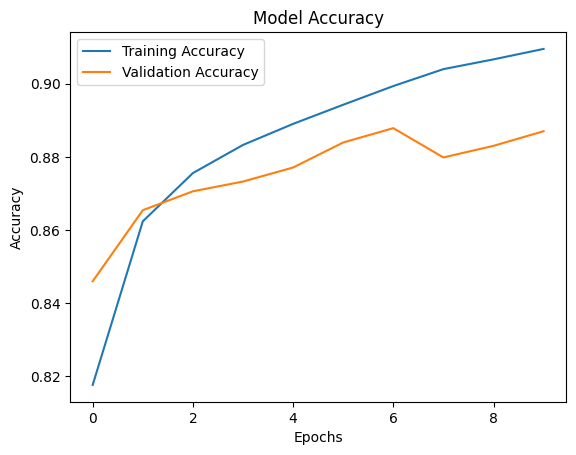

In [28]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

## Model Accuracy Analysis

### Training Accuracy (Blue Line):
- Starts around **0.82**
- Steadily climbs to above **0.90** by the **9th epoch**

### Validation Accuracy (Orange Line):
- Begins at about **0.83**
- Peaks near **0.88** by the **3rd epoch**
- Fluctuates slightly, ending just below **0.88** by the **9th epoch**

### Interpretation:
1. **Training Accuracy Increase:**
   - The consistent rise in training accuracy indicates the model is learning and fitting the training data better over the epochs.
2. **Validation Accuracy Fluctuation:**
   - The initial rise in validation accuracy shows improvement, but the subsequent fluctuations suggest overfitting to the training data after the **3rd epoch**.
3. **Accuracy Gap:**
   - The slight drop in validation accuracy compared to training accuracy by the **9th epoch** is normal, as models often perform slightly better on known data than on unseen validation data.

### Conclusion:
- The model is learning effectively but might benefit from regularization techniques to mitigate overfitting and improve generalization to new data.


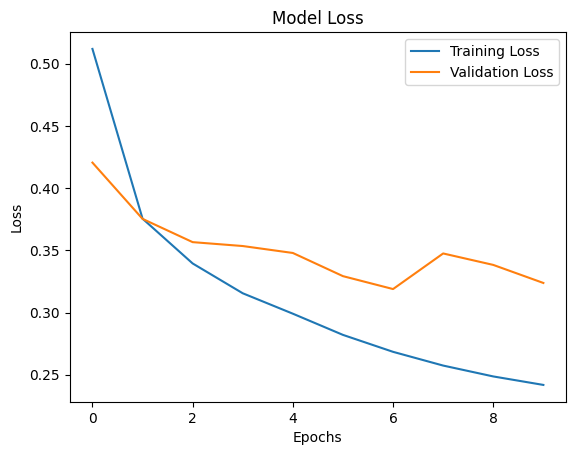

In [31]:
# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

## Model Loss Analysis

### Overview
- **Training Loss (Blue Line)**: Starts around **0.50** and steadily decreases to about **0.25** by the **9th epoch**.
- **Validation Loss (Orange Line)**: Starts around **0.40**, initially decreases, and then shows some fluctuations before ending at around **0.30** by the **9th epoch**.

### Key Points
- **Training Loss Reduction**: The continuous decrease in training loss indicates that the model is learning and getting better at fitting the training data over time.
- **Validation Loss Behavior**: The validation loss also decreases, which is a good sign. However, the slight fluctuations suggest the model might be overfitting or there's some variance in the validation data.

### Conclusion
- **Overall Improvement**: Both training and validation losses are decreasing, showing that the model is improving its performance.
- **Potential Overfitting**: The fluctuations in validation loss suggest that the model might be overfitting to the training data.



# Test Set Prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


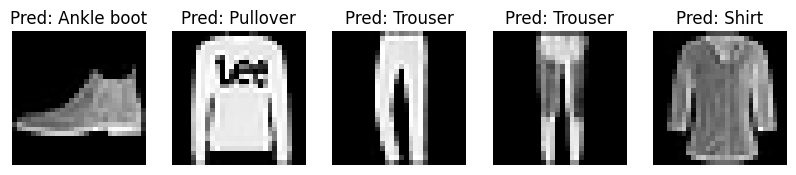

In [30]:
# Use the model to predict the classes for the test set
predictions = model.predict(X_test)

# Display a few sample predictions
num_samples = 5  # Display 5 sample images and their predictions
plt.figure(figsize=(10, 5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(X_test[i], cmap='gray')  # Display the test image
    plt.title(f"Pred: {class_names[np.argmax(predictions[i])]}")  # Display predicted class
    plt.axis('off')
plt.show()


In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

# Predict the classes for the test set
test_predictions = np.argmax(model.predict(X_test), axis=1)

# Calculate precision, recall, and F1-score
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')

# Print the evaluation metrics
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1-Score: {test_f1}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8825 - loss: 0.3505
Test Accuracy: 0.8816999793052673
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Test Precision: 0.8821561998819795
Test Recall: 0.8817
Test F1-Score: 0.880659696825638


In [39]:
from sklearn.metrics import classification_report
# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, test_predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1000
           1       0.98      0.97      0.98      1000
           2       0.76      0.85      0.80      1000
           3       0.84      0.92      0.88      1000
           4       0.86      0.72      0.78      1000
           5       0.95      0.96      0.96      1000
           6       0.73      0.67      0.70      1000
           7       0.95      0.95      0.95      1000
           8       0.97      0.98      0.97      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



### Classification Report Interpretation

The **Classification Report** provides detailed performance metrics for each class in the Fashion MNIST dataset. It includes the following metrics: **precision**, **recall**, **f1-score**, and **support**.

#### 1. Precision:
- **Precision** represents the proportion of correct positive predictions relative to all positive predictions made by the model. Higher precision means fewer false positives.
- For example:
  - **Class 0** has a precision of **0.82**, meaning 82% of the predictions for class 0 were correct.
  - **Class 1** has a precision of **0.98**, meaning 98% of the predictions for class 1 were correct.
  - **Class 6** has a precision of **0.73**, meaning 73% of the predictions for class 6 were correct (relatively lower precision).

#### 2. Recall:
- **Recall** represents the proportion of actual positives correctly predicted by the model. Higher recall means fewer false negatives.
- For example:
  - **Class 0** has a recall of **0.84**, meaning 84% of the actual class 0 images were correctly identified.
  - **Class 1** has a recall of **0.97**, meaning 97% of the actual class 1 images were identified.
  - **Class 6** has a recall of **0.67**, meaning only 67% of the actual class 6 images were identified (relatively low recall).

#### 3. F1-Score:
- The **F1-score** is the harmonic mean of precision and recall, providing a balance between the two metrics. It is particularly useful when dealing with class imbalance.
- For example:
  - **Class 5** has an F1-score of **0.96**, indicating a good balance between precision and recall.
  - **Class 6** has an F1-score of **0.70**, showing a weaker performance in predicting this class.

#### 4. Support:
- **Support** refers to the number of actual occurrences of each class in the dataset. In this case, each class has 1000 samples, ensuring a balanced dataset.

#### 5. Overall Accuracy:
- The **overall accuracy** is **0.88**, meaning the model correctly predicted the class for 88% of the images in the test set. This is a good performance, though it may mask weaker performance in certain classes.

#### 6. Macro and Weighted Averages:
- **Macro average**: This is the average of precision, recall, and F1-score across all classes, treating each class equally. In this case, the macro average is **0.88** for precision, recall, and F1-score, indicating balanced performance across all classes.
- **Weighted average**: This metric accounts for the number of samples per class, giving more weight to classes with more samples. The weighted average is also **0.88**, suggesting balanced performance even when considering the number of instances in each class.

### Summary:
- **Good Performance**: The model performs well overall with an **accuracy of 88%**.
- **Strong Class Predictions**: The model excels in predicting classes like **class 1** (precision = 0.98, recall = 0.97), **class 5** (precision = 0.95, recall = 0.96), and **class 8** (precision = 0.97, recall = 0.98).
- **Weak Performance**: The model has a relatively lower performance on **class 6** (precision = 0.73, recall = 0.67, F1 = 0.70), struggling to identify this class accurately.
- **Balanced Overall**: Both **macro avg** and **weighted avg** scores suggest that the model has a generally balanced performance across all classes.


# Building the CNN model

The CNN will include the following layers:

Convolutional Layers: To learn spatial features.
Pooling Layers: To reduce dimensionality.
Fully Connected Layers: To make final predictions.
python
Copy code


In [40]:
model = models.Sequential([
    # First Convolutional Layer: 32 filters, kernel size 3x3, ReLU activation
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),

    # Max Pooling Layer: Pool size 2x2
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Layer: 64 filters, kernel size 3x3, ReLU activation
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Max Pooling Layer: Pool size 2x2
    layers.MaxPooling2D((2, 2)),

    # Flatten the output from 2D to 1D for the fully connected layer
    layers.Flatten(),

    # Fully Connected Layer: 128 neurons with ReLU activation
    layers.Dense(128, activation='relu'),

    # Output Layer: 10 neurons (one for each class) with softmax activation
    layers.Dense(10, activation='softmax')
])

# Summary of the model to view architecture
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

# Compile the model

We will use the Adam optimizer, sparse categorical crossentropy loss, and accuracy as the evaluation metric.




In [41]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Train the Model

Train the model for a specified number of epochs and use a validation split to monitor performance on a validation set.

In [42]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.7660 - loss: 0.6487 - val_accuracy: 0.8757 - val_loss: 0.3472
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - accuracy: 0.8780 - loss: 0.3361 - val_accuracy: 0.8903 - val_loss: 0.2989
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 104s 55ms/step - accuracy: 0.8968 - loss: 0.2829 - val_accuracy: 0.8997 - val_loss: 0.2683
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 163s 69ms/step - accuracy: 0.9075 - loss: 0.2448 - val_accuracy: 0.9022 - val_loss: 0.2580
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 110s 47ms/step - accuracy: 0.9223 - loss: 0.2114 - val_accuracy: 0.9109 - val_loss: 0.2531
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 69s 39ms/step - accuracy: 0.9334 - loss: 0.1869 - val_accuracy: 0.9110 - val_loss: 0.2456
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 38ms/step - accuracy: 0.9400 - loss: 0.1642 - val_accuracy: 0.9033 - val_loss: 0.2751
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.944

# Evaluate the Model

In [43]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9054 - loss: 0.3065
Test accuracy: 0.909600019454956


# Visualize Training and Validation Loss/Accuracy

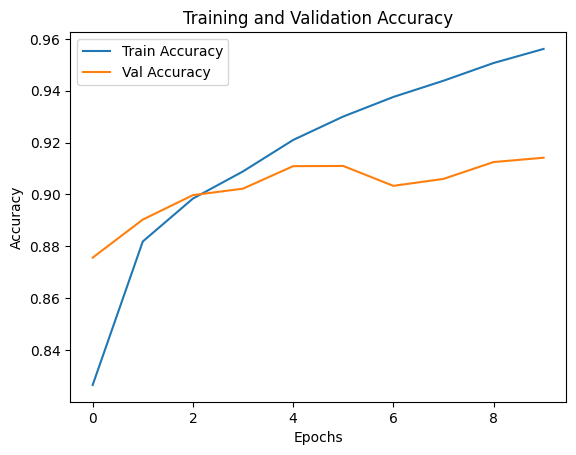

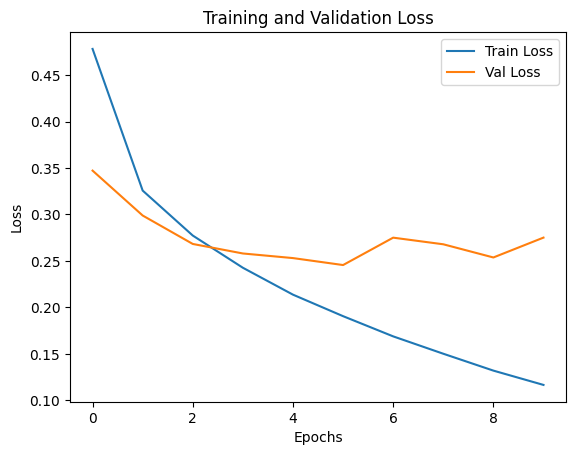

In [44]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


## Training and Validation Accuracy Analysis

### Overview
- **Training Accuracy (Blue Line)**: Shows a steady increase in accuracy, starting from around **0.84** and reaching close to **0.96** by the **10th epoch**.
- **Validation Accuracy (Orange Line)**: Begins around **0.87**, peaks at approximately **0.91** around the **3rd epoch**, and then remains relatively stable with slight fluctuations, ending at around **0.91** by the **10th epoch**.

### Key Points
- **Training Accuracy Increase**: The steady rise in training accuracy indicates that the model is effectively learning and improving its performance on the training data.
- **Validation Accuracy Plateau**: The initial increase in validation accuracy followed by a plateau suggests that while the model performs well on unseen data up to a point, additional training does not significantly improve this performance.
- **Potential Overfitting**: The plateau and fluctuations in validation accuracy suggest that the model might be starting to overfit the training data after the **3rd epoch**, where the validation accuracy stops significantly increasing.

### Conclusion
- **Model Learning**: The model shows good learning on the training data with continuous improvement in training accuracy.
- **Generalization**: The validation accuracy indicates that the model generalizes well to new data initially but doesn't improve much beyond the **3rd epoch**, suggesting possible overfitting.


## Training and Validation Loss Analysis

### Overview
- **Training Loss (Blue Line)**: Steadily decreases over the epochs, indicating that the model is learning and improving its performance on the training data.
- **Validation Loss (Orange Line)**: Decreases initially but starts to fluctuate after a certain number of epochs, suggesting potential overfitting.

### Key Points
- **Training Loss Reduction**: The continuous decrease in training loss shows effective learning and better fitting of the training data.
- **Validation Loss Fluctuations**: The initial decrease in validation loss followed by fluctuations indicates that while the model is improving initially, it may be overfitting to the training data as it continues to train.

### Conclusion
- **Model Learning**: The model shows good initial learning on the training data.
- **Generalization**: The fluctuations in validation loss suggest that the model's ability to generalize to unseen data might be compromised as training progresses.


# Make Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step


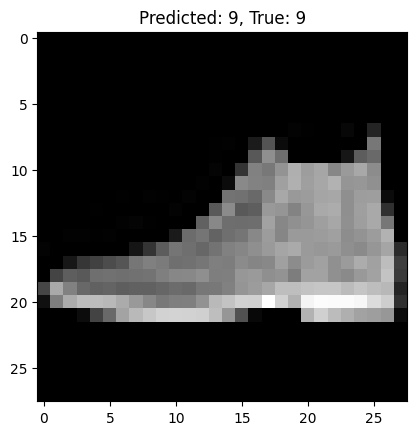

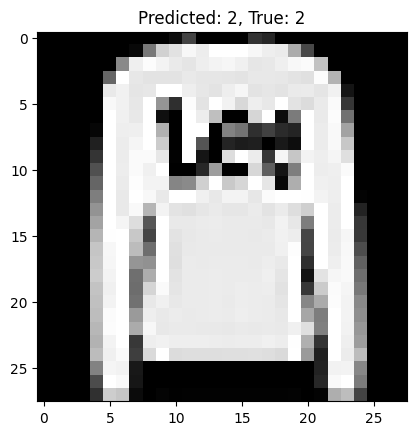

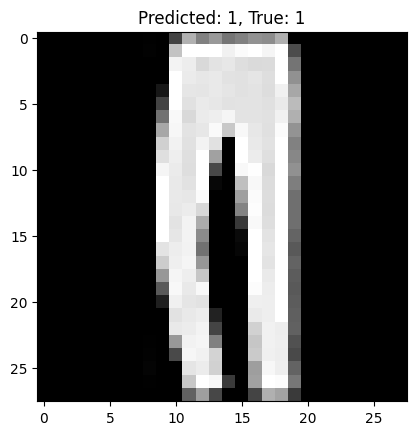

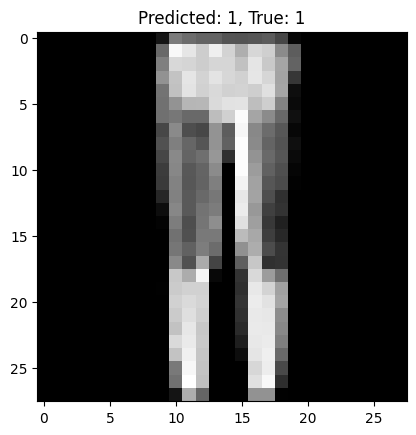

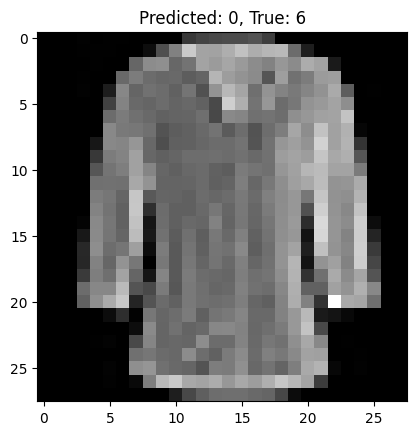

In [45]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Display a few sample predictions along with the corresponding images
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {y_pred[i].argmax()}, True: {y_test[i]}")
    plt.show()


# Generate the Classification Report

In [46]:
# Convert predictions to class labels (since model outputs probabilities)
y_pred_classes = np.argmax(y_pred, axis=1)
# Generate and display the classification report
print(classification_report(y_test, y_pred_classes))


              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1000
           1       1.00      0.98      0.99      1000
           2       0.86      0.86      0.86      1000
           3       0.89      0.93      0.91      1000
           4       0.86      0.86      0.86      1000
           5       0.99      0.95      0.97      1000
           6       0.78      0.72      0.75      1000
           7       0.92      0.98      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



### CNN Model - Classification Report Interpretation

The classification report for the CNN model provides detailed metrics such as **precision**, **recall**, **f1-score**, and **support** for each class (from 0 to 9) in the Fashion MNIST dataset. Below is an interpretation of the key results:

- **Precision**: Precision indicates how many of the instances predicted as positive are actually positive. For instance:
  - For class 1 (T-shirt/top), precision is 1.00, meaning all predictions made for this class were correct.
  - For class 6 (Shirt), precision is 0.78, suggesting a higher number of false positives for this class.

- **Recall**: Recall measures how many of the actual positive instances were correctly predicted by the model. For example:
  - For class 3 (Dress), recall is 0.93, meaning the model correctly identified 93% of all actual dress images.
  - For class 6 (Shirt), recall is 0.72, indicating that the model missed 28% of the actual shirt images.

- **F1-Score**: The F1-Score is the harmonic mean of precision and recall, providing a balance between the two. The F1-scores for all classes are quite high, indicating that the model is performing well across different categories.
  - For class 5 (Sandal), the F1-Score is 0.97, meaning the model has a good balance between precision and recall for this class.
  - For class 6 (Shirt), the F1-Score is 0.75, which reflects the trade-off between precision and recall.

- **Support**: Support refers to the number of true instances for each class in the dataset. In this case, each class has 1000 instances in the test set.

### Overall Model Performance:
- **Accuracy**: The overall accuracy of the model is 0.91, meaning the CNN model correctly classified 91% of the test samples.
- **Macro Average**: The macro average precision, recall, and F1-score are all 0.91, indicating that the model is well-balanced in terms of performance across all classes.
- **Weighted Average**: The weighted average for precision, recall, and F1-score is also 0.91, taking into account the support for each class.

### Conclusion:
The CNN model has performed well on the Fashion MNIST dataset with high accuracy, especially in distinguishing classes like T-shirts, dresses, and sandals. However, there is a slight variation in performance for certain classes like "Shirt" (class 6), where the precision and recall are relatively lower. This could indicate that further fine-tuning or more advanced techniques could be applied for improving the model's handling of certain classes.


### Comparison Between ANN and CNN Performance on Fashion MNIST Dataset



 **Performance**:
   - **ANN**: Achieved an accuracy of 88% on the Fashion MNIST dataset. While effective, it is not as optimized for image data as CNNs.
   - **CNN**: Achieved an accuracy of 91%, outperforming the ANN by 3%. The CNN model performed better in recognizing complex image features and achieving higher precision, recall, and F1-scores, especially for harder-to-classify classes like "Shirt."

### Conclusion:
- **Which performs better?**
  - The **CNN model** outperforms the **ANN model** by a significant margin in terms of accuracy (91% vs. 88%) and overall classification performance (precision, recall, F1-score). The CNN's ability to capture spatial relationships in images makes it the superior choice for image classification tasks, such as the Fashion MNIST dataset.
